In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from scipy import signal
# sys.path.insert(0, os.path.abspath('../posture_detector'))

In [2]:
from posture_detector.data import load_raw_data

In [3]:
!ls ../reader/data/


ls: cannot access '../reader/data/': No such file or directory


In [4]:
file_path = '../data/raw/datalog_at_2020-11-26_23_58_33.576158'
df = pd.read_csv(file_path, header=None)

/home/gabriel/Documents/Projetos/Eletronica/Arduino/posture_detector/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = df.loc[:601207]

In [6]:
df[0] = pd.to_numeric(df[0], 'coerce')
df = df[df[0] < 1024]
# ?pd.to_numeric

In [19]:
df[1] = df[1].apply(lambda x: str(x).replace('\'', '').replace(' ',''))

In [34]:
set(df[1].unique())

{'', '9', 'n', 'nan', 's', 't', 'z'}

In [23]:
degs = {
    '0': 'a', '5': 'b', '10': 'c', '20': 'd', '30': 'e',
    '45': 'f', '90': 'h'}
degs

{'0': 'a', '5': 'b', '10': 'c', '20': 'd', '30': 'e', '45': 'f', '90': 'h'}

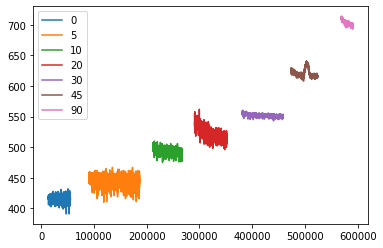

In [24]:
angles = degs.keys()
for d in angles:
    split = df[ df[1] == degs[d] ]
    plt.plot(split[0])
plt.legend(angles)
plt.show()

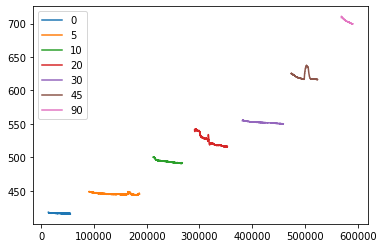

In [25]:
b, a = signal.butter(1, 0.01)

for d in angles:
    split = df[ df[1] == degs[d] ]
    split.loc[:, 0] = signal.filtfilt(b, a, split[0])
    plt.plot(split[0])
plt.legend(angles)
plt.show()

In [22]:
df[df[1] == 't'][0].mean()

nan